## The Correlation Coefficient

The `correlation coefficient` measures the extent to which the reltionship between 2 variables is linear.

Its value is between -1 and 1. A positive coefficient indicates that the variables are directly related, i.e. when once increases the other one also increases. A negative coefficient indicates that the variables are inversely related, so that when one increases the other decreases. The closer to 0 the correlation coefficient is, the weaker the relationship between variables.

The correlation coefficient of two series X and Y is defined as: **[the covariance of (X,Y)] divided by [std(X) * std(Y)]**

## Correlation vs Covariance

Correlation is simply a normalized form of covariance. They are otherwise the same, and are often used semi-interchangeably in everyday conversation.

## Covariance isn't that meaningful by itself

Start with two variables X and Y and take the covariance of the 2

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
sns.set_style("whitegrid")

In [13]:
X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.1, 50)

np.cov(X,Y)[0,1]

0.17577111088199004

Correlation uses information about the variance of X and Y to normalize this metric. Once have normalized the metric to the -1 to 1 scale, can make meaningful statements and compare correlations.

In [14]:
X = np.random.rand(50)
Y = 2 * X + 4
print('Covariance of C and Y: \n' + str(np.cov(X, Y)))
print('Correlation of X and Y: \n' + str(np.corrcoef(Y,Y)))

Covariance of C and Y: 
[[0.07409433 0.14818866]
 [0.14818866 0.29637732]]
Correlation of X and Y: 
[[1. 1.]
 [1. 1.]]


## Why do both `np.cov` and `np.corrcoef` return matrics?

The covariance matrix is an important concept in statistics. Often people will refer to the covariance of two variables X and Y, but in reailty that is just one entry in the covariance matrix of. and Y. For each input variable, have one row and one column. The diagonal is just the variance of that variable, or Cov(X,X) entries off the diagonal are covariances between different variables.

In [15]:
cov_matrix = np.cov(X,Y)

# need to manually set the degres of freedom on X to 1
# numpy defualts to 0 for variance
error = cov_matrix[0,0] - X.var(ddof=1)

print('error: ' + str(error))

error: 0.0


Correlation: -0.15305091287316405
Built-in Correlation: -0.14998989461570073


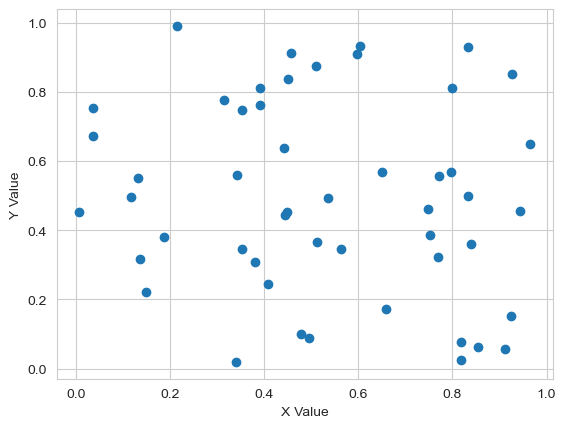

In [16]:
X = np.random.rand(50)
Y = np.random.rand(50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

# take the relevant value from the matrix returned by np.cov
print('Correlation: ' + str(np.cov(X,Y)[0,1]/(np.std(X) *np.std(Y))))

# also use the built-in correlation function
print('Built-in Correlation: ' + str(np.corrcoef(X,Y)[0,1]))

plt.show()

Now see what two `correlated` sets of data look like:

Correlation: 0.9657196239143144


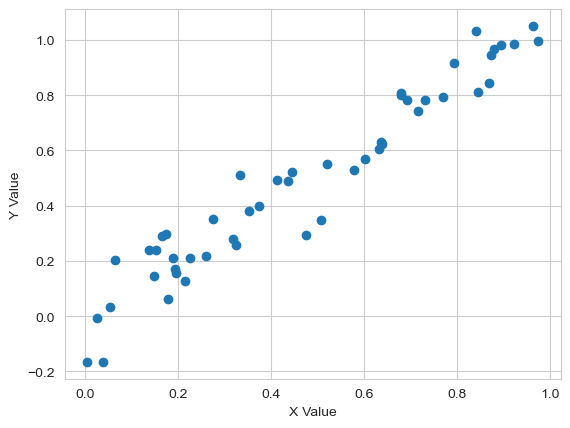

In [17]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: ' + str(np.corrcoef(X,Y)[0,1]))
plt.show()

Dial down the relationship by introducing some mroe noise:

Correlation: 0.8307381710618222


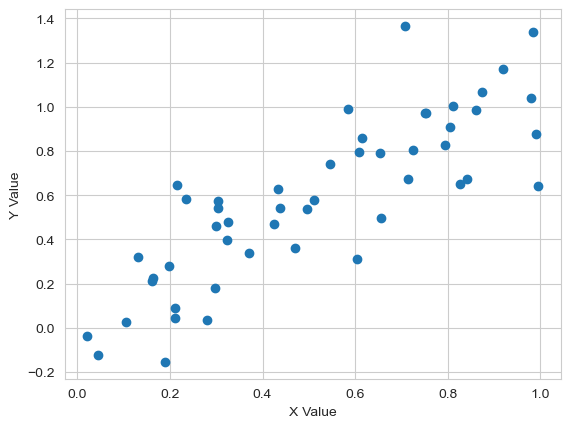

In [18]:
X = np.random.rand(50)
Y = X + np.random.normal(0, .2, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: ' + str(np.corrcoef(X,Y)[0,1]))

plt.show()

Let's see what an inverse relationship looks like:

Correlation: -0.9291049911676997


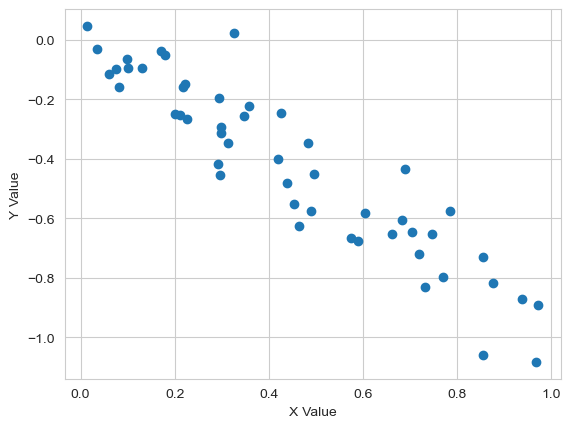

In [19]:
X = np.random.rand(50)
Y = -X + np.random.normal(0,.1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: ' + str(np.corrcoef(X,Y)[0,1]))

plt.show()

## How is this useful in finance?


### Determining related assets

Once have established that two series are probably related, can use that in an effort to predict future values of the series. For example, let's look at the price of AAPL and a semiconductor equipment manufacturer, LRCX"

Correlation coefficients:
LRCX and AAPL:  0.9443739684204655


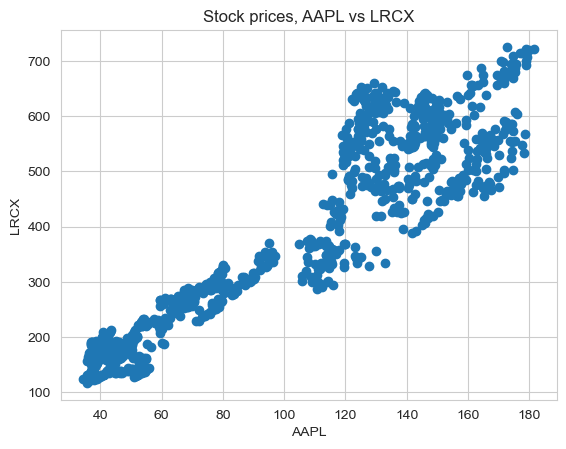

In [31]:
AAPL_df = pd.read_csv('/Users/brendan/Desktop/Python/BoostedAI/prices/AAPL.csv')
AAPL_price = AAPL_df['adjClose']
returns_AAPL = AAPL_df['adjClose'].pct_change()[1:]

LRCX_df = pd.read_csv('/Users/brendan/Desktop/Python/BoostedAI/prices/LRCX.csv')
LRCX_price = LRCX_df['adjClose']
returns_LRCX = LRCX_df['adjClose'].pct_change()[1:]

plt.scatter(AAPL_price, LRCX_price)
plt.xlabel('AAPL')
plt.ylabel('LRCX')
plt.title('Stock prices, AAPL vs LRCX')
print('Correlation coefficients:')
print('LRCX and AAPL: ', np.corrcoef(AAPL_price, LRCX_price)[0,1])
plt.show()

## Constructing a portfolio of uncorrelated assets

Another reason that correlation is useful in finance is that uncorrelated assets produce the best portfolios. THe intuition for this is that if the assets are uncorrelated, a drawdown in one will not correspond with a drawdown in another. This leads to a very stable return stream when many uncorrelated assets are combined

## Limitations

### SIgnificance

It's hard to determine whether or not a correlation is significant, especially when the variables are not normally distributed. Their correlation coefficient is close to 1, so it's safe to say the two stock prices are correlated over the time period. Unsure if it is however indicatve of future correlation. AAPL and LRCX are more correlated with each other than with the avg stock.

One fundamental problem is that it is easy to datamine correlations by picking the right time period. So to aboid this, should compute the correlation of two quantities over many historical time peruods and examine the distribution of the correlation coeffcient.

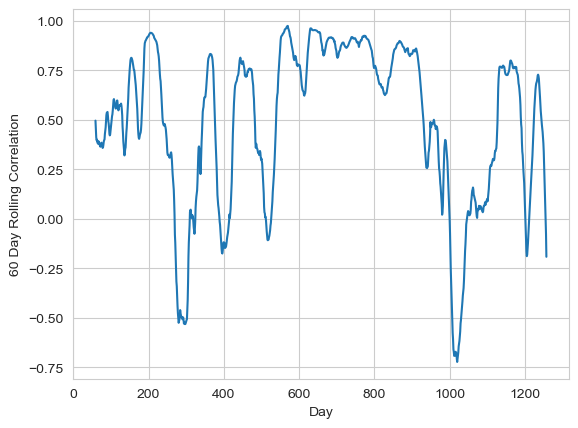

In [35]:
rolling_correlation = AAPL_df['adjClose'].rolling(60).corr(LRCX_df['adjClose'])
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60 Day Rolling Correlation')
plt.show()

## Non-Linear Relationships

The correlation coefficient can be useful for examining the strength of the relationship between 2 variables. But it's important to remember that two variables may be assocaited in different, predictable ways this analyis would not pick up.

For instance, one variable might follow the behavior of a second, but with a lag - so there are tehniques to deal with this lagged correaltion. Alternatively, avariable may be related to the rate of change of another.

Neither of these relationships are linear, but can be very useful if detected.

Additionally, the correlation coefficient canbe very sensitive to outliers. This means that including or excluding even a couple of data points can alter the result. As an example, make the noise distribution poisson rather than normal:

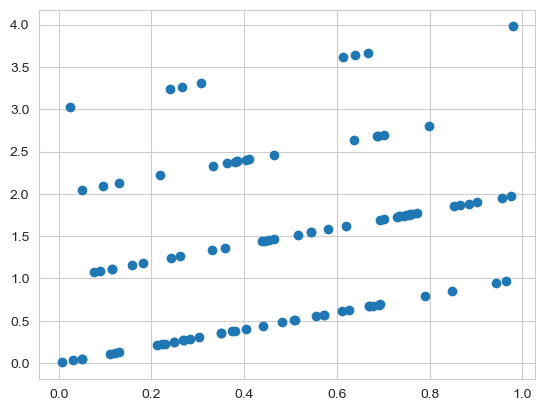

In [36]:
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)
plt.scatter(X,Y)
np.corrcoef(X,Y)[0,1]
plt.show()